In [2]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [3]:
# sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
sigmoid(-0.1666)

0.45844606828872597

In [5]:
def relu(x):
    if x < 0:
        return x
    elif x == 0:
        return 0.5
    else:
        return 1

## Création d'un perceptron from scratch

### Génération des données

In [6]:
donnes = np.array([[1,0],
          [1,1],
          [0,0],
         [0,1] ])
resultats = np.array([[0],[1],[0],[0]])

### Géneration des poids

In [7]:
random.seed(1)

w11= random.uniform(-1,1)
w11

-0.165955990594852

In [8]:
random.seed(2)

w21= random.uniform(-1,1)
w21

-0.12801019571599248

### Ajout du biais

In [9]:
biais = 1
wb =0

In [10]:
#hyperparamètres
tauxaprentissage = 0.1
nbepoch = 200

#### DRY > Don't repeat yourself
1. Somme pondérée
2. La fonction d'activation  >  à  tout les metrics, et voir laquelle à le meilleurs score (sigmoïde, relu, tanh, etc...)
3. Calcul de l'erreur
4. Calcul du gradient descent
5. Calcul de la valeur d'ajustement
6.  Calcul ddu nouveau poids
7. Calcul du Mean Square Errror MSE (Fonction à créer) 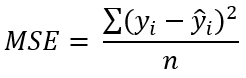

In [11]:
# sigmoïd

def sigmoid1(x):
  return (1/(1 + np.exp(-x)))

In [12]:
def tanh(x):
  return ((np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x)))

In [13]:
def relu(x):
  if x > 0 :
    return x
  elif x == 0:
    return 0.5
  else:
    return 0

In [14]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [15]:
def sommePonderee(x1,x2,xbiais, poids1, poids2, poidsbiais):
    sommePond = x1 *poids1 + x2*poids2 + xbiais*poidsbiais
    return sommePond
    

In [16]:
# DRY > Don't repeat yourself
# Somme pondérée

# La fonction d'activation  >  à  tout les metrics, et voir laquelle à le meilleurs score (sigmoïde, relu, tanh, etc...)
def fonctionActivation(nom, sommePonderee):
    if nom == "sigmoïde":
        #fct sigmoïde
        Activation = sigmoid1(sommePonderee)
    elif nom == "ReLu":
        #fct Relu
        Activation = relu(sommePonderee)
    elif nom == "tanh":
        #fct TanH
        Activation = tanh(sommePonderee)
    else:
        #fct softmax
        Activation = softmax(sommePonderee)
    
    return Activation
        
# Calcul de l'erreur
# Calcul du gradient descent
# Calcul de la valeur d'ajustement
# Calcul ddu nouveau poids
def Ajustement_poids(erreur, predictions_realisees, val_input):
    gradient = -1 * erreur * (1- predictions_realisees) * val_input
    return gradient
# Calcul du Mean Square Errror MSE (Fonction à créer) 

# def calcul_MSE(predictions_realisees, predictions_attendues): 
#    i=0 
#    for _ in predictions_attendues: 
#        difference = predictions_attendues[i] - predictions_realisees[i] 
#        carreDifference = difference * difference 
#        somme = somme + carreDifference 
#        i += 1
#    moyenne_quadratique = 1 / (len(predictions_attendues)) * somme 
#    return moyenne_quadratique 


def calcul_MSE(predictions_realisees, predictions_attendues): 
    return np.square(np.subtract(predictions_attendues, predictions_realisees)).mean()

In [18]:
# On se servira 
list_epoch= []
list_MSE = []
for epoch in range(1, nbepoch+1):
    i=0 
    print(f"EPOCH {epoch} \ {nbepoch+1}")
    # boucler sur chaque lign de data
    x1 = 1
    x2 = 0
    xbiais = 1
    poidsbiais = 0
    random.seed(1)
    poids1 = random.uniform(-1, 1)
    random.seed(2)
    poids2 = random.uniform(-1,1)

    taux_apprentissage = 0.1
    
    
    for ligne, prediction_attendu in zip(donnes, resultats):
        x1 = ligne[0]
        x2 = ligne[1]
        print(f"x1 , x2 - {ligne} pred_attendue - {prediction_attendu}" )
        print(f"EPOCH {epoch} \ {nbepoch+1} - Observation: {i+1} \ {len(donnes)}")


        sommePond = sommePonderee(x1, x2, xbiais, poids1, poids2, poidsbiais)
        predictions_realisees = fonctionActivation("tanh", sommePond)
        erreur = prediction_attendu[0] - predictions_realisees
        print(f"erreur - {erreur}")

        stockagepoiDesInfos = [x1, poids1, x2, poids2, xbiais, poidsbiais, predictions_realisees, epoch, MSE]
        # Màj du poids
        gradient1 = Ajustement_poids(erreur, predictions_realisees, x1)
        gradient2 = Ajustement_poids(erreur, predictions_realisees, x2)
        gradientbiais = Ajustement_poids(erreur, predictions_realisees, xbiais)
        ajustementPoids1 = gradient1 * taux_apprentissage
        ajustementPoids2 = gradient2 * taux_apprentissage
        ajustementPoidsbiais = gradientbiais * taux_apprentissage
        poids1 = poids1 - ajustementPoids1 
        poids2 = poids2 - ajustementPoids2 
        poidsbiais = poidsbiais - ajustementPoidsbiais

        
        MSE = calcul_MSE(predictions_realisees, prediction_attendu)
        i += 1
        print(f"MSE = {MSE }")
        list_MSE.append(MSE)
    list_epoch.append(epoch)


EPOCH 1 \ 201
x1 , x2 - [1 0] pred_attendue - [0]
EPOCH 1 \ 201 - Observation: 1 \ 4
erreur - 0.16444903692853854


NameError: name 'MSE' is not defined

In [ ]:
# for epoch, mse in zip(list_epoch,list_MSE):
# list_epoch
list_MSE
# plt.plot(list_epoch, list_MSE)
# plt.show()

[0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.03503411680428899,
 0.0350341